In [22]:
import numpy as np
import pandas as pd

In [2]:
# [Po]rto [A]legre [W]eather dataframe being loaded from the csv with ';' as separator
poaw = pd.read_csv('DATA_POA_2001-01-01_2022-03-11.csv',sep=';')
poaw.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (mm)","TEMPERATURA MAXIMA, DIARIA (C)","TEMPERATURA MEDIA, DIARIA (C)","TEMPERATURA MINIMA, DIARIA (C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (%)",Unnamed: 7
0,2001-01-01,0,"30,1","23,616667","18,4","68,458333",48.0,NaN
1,2001-01-02,0,"32,1","25,475",20,"69,958333",45.0,NaN
2,2001-01-03,0,"33,4","26,345833",21,"69,083333",43.0,NaN
3,2001-01-04,0,"35,5","27,429167","21,2","65,041667",37.0,NaN
4,2001-01-05,0,"35,6","27,6375","24,6","67,25",35.0,NaN


In [3]:
# Drop the last and useless column
poaw.drop(labels='Unnamed: 7',axis=1,inplace=True)

In [4]:
# For simplification and translation purposes I will change the columns names
new_col_names = ['Date',
                 'Total Precip',
                 'Max Temp','Average Temp',
                 'Min Temp',
                 'Avg Relative Humidity',
                 'Min Relative Humidity']

poaw.columns = new_col_names

In [5]:
poaw.head()

,Date,Total Precip,Max Temp,Average Temp,Min Temp,Avg Relative Humidity,Min Relative Humidity
0,2001-01-01,0,"30,1","23,616667","18,4","68,458333",48.0
1,2001-01-02,0,"32,1","25,475",20,"69,958333",45.0
2,2001-01-03,0,"33,4","26,345833",21,"69,083333",43.0
3,2001-01-04,0,"35,5","27,429167","21,2","65,041667",37.0
4,2001-01-05,0,"35,6","27,6375","24,6","67,25",35.0


In [6]:
poaw.head()

,Date,Total Precip,Max Temp,Average Temp,Min Temp,Avg Relative Humidity,Min Relative Humidity
0,2001-01-01,0,"30,1","23,616667","18,4","68,458333",48.0
1,2001-01-02,0,"32,1","25,475",20,"69,958333",45.0
2,2001-01-03,0,"33,4","26,345833",21,"69,083333",43.0
3,2001-01-04,0,"35,5","27,429167","21,2","65,041667",37.0
4,2001-01-05,0,"35,6","27,6375","24,6","67,25",35.0


In [7]:
#Convert the "Date" col to datetime type and the other cols to float type (the last col is already float)
poaw['Date'] = pd.to_datetime(poaw['Date'])

#List with all the cols to be changed from str to float
cols_to_float = ['Total Precip', 'Max Temp', 'Average Temp', 'Min Temp', 'Avg Relative Humidity']

poaw[cols_to_float] = poaw[cols_to_float].apply(lambda x: x.str.replace(',','.').astype(float))

#non used trash
#poaw['Max Temp'] = poaw.iloc[:,2:3].apply(lambda x: x.str.replace(',','.').astype(float))
#poaw['Average Temp'] = poaw.iloc[:,3:4].apply(lambda x: x.str.replace(',','.').astype(float))
#poaw['Min Temp'] = poaw.iloc[:,4:5].apply(lambda x: x.str.replace(',','.').astype(float))
#poaw['Avg Relative Humidity'] = poaw.iloc[:,5:6].apply(lambda x: x.str.replace(',','.').astype(float))

In [19]:
poaw.head()

,Date,Total Precip,Max Temp,Average Temp,Min Temp,Avg Relative Humidity,Min Relative Humidity
0,2001-01-01,0.0,30.1,23.616667,18.4,68.458333,48.0
1,2001-01-02,0.0,32.1,25.475000,20.0,69.958333,45.0
2,2001-01-03,0.0,33.4,26.345833,21.0,69.083333,43.0
3,2001-01-04,0.0,35.5,27.429167,21.2,65.041667,37.0
4,2001-01-05,0.0,35.6,27.637500,24.6,67.250000,35.0


In [33]:
#Droping rows where there are at least 3 NaN
poaw.dropna(thresh=3, inplace=True)

## Starting to explore with visualizations

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

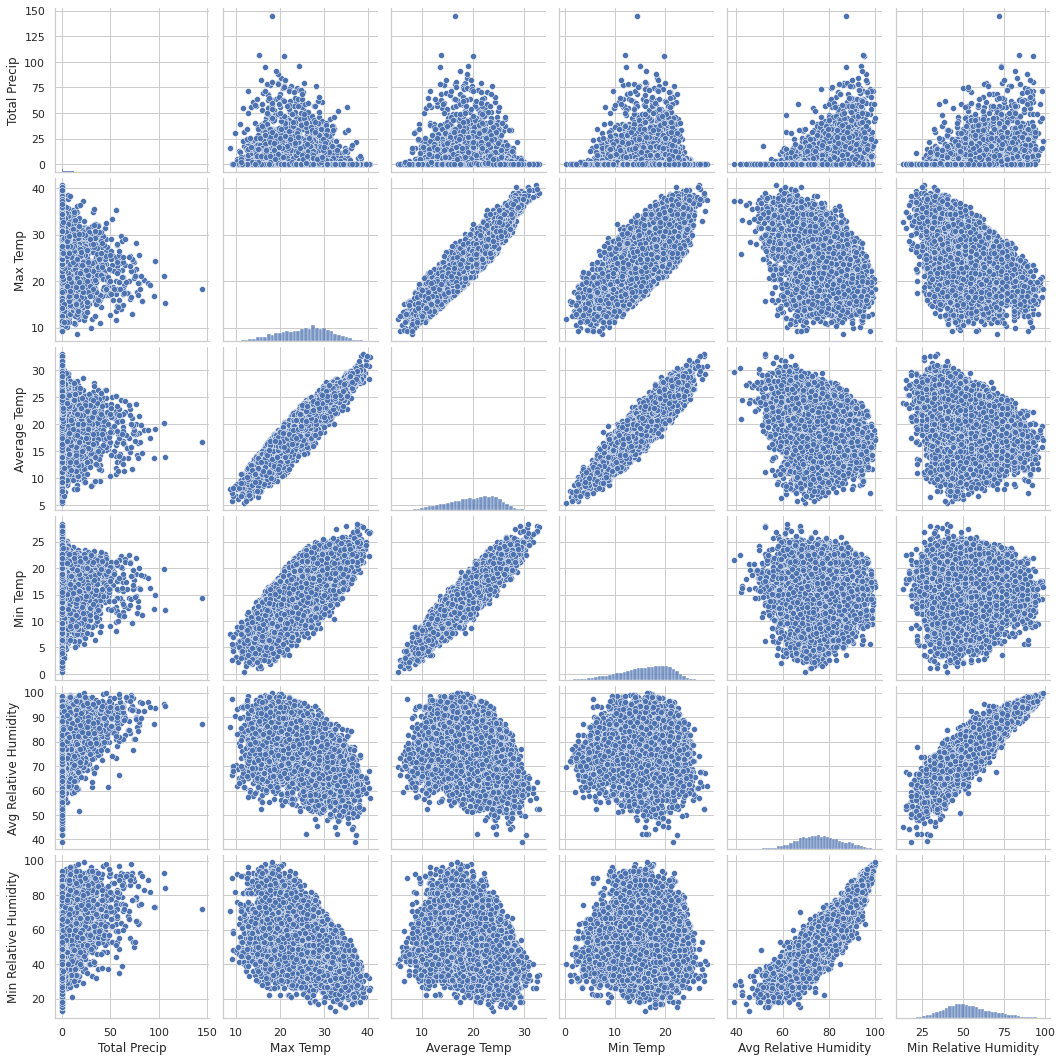

In [54]:
sns.pairplot(poaw)

In [59]:
by_year = poaw.groupby(pd.Grouper(key='Date',freq='Y')).mean()

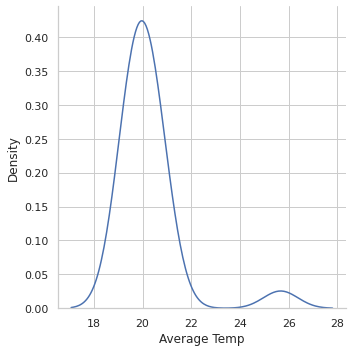

In [64]:
sns.displot(by_year['Average Temp'],kind='kde')